## Model Selection

The purpose of this notebook is to conduct preliminary and baseline modeling to identify which machine learning algorithms perform best on the housing price dataset. At this stage, the focus is on testing a variety of models without applying hyperparameter tuning or cross-validation. The goal is to establish baseline performance metrics that will guide the selection of models for further refinement.

### Key Steps

Baseline Modeling:
    Implement and evaluate a diverse range of machine learning models to understand their initial performance on the preprocessed dataset. This step helps in identifying models that are likely to yield better results after tuning.

Models Considered:
    Linear Regression: A simple and interpretable model that establishes a foundational benchmark.
    Elastic Net: Combines L1 and L2 regularization to handle multicollinearity and select important features.
    Decision Tree: A model that splits data into branches based on feature values, useful for capturing non-linear relationships.
    Random Forest: An ensemble of decision trees that improves predictive accuracy and reduces overfitting.
    XGBoost: A high-performance gradient boosting model that is efficient and often yields strong predictive power.
    LightGBM: A fast, gradient boosting framework optimized for large datasets, with efficient training.
    Neural Network (MLPRegressor): A multi-layer perceptron regressor capable of capturing complex, non-linear relationships in the data.

Evaluation:
Each model is evaluated using key metrics:

    Mean Absolute Error (MAE): Measures the average magnitude of errors in predictions.
    Root Mean Squared Error (RMSE): Penalizes larger errors and provides insight into the model's performance on larger deviations.
    R-squared (R²): Indicates the proportion of variance in the target variable that is explained by the model, providing insight into overall model fit.

In [1]:
#Import preprocessed data
import pandas as pd
import numpy as np
from functions_variables import get_error_scores, display_results_sample, find_best_regression_model

#Independant variable training data
X_train = pd.read_csv("../data/preprocessed/X_train_scaled.csv", index_col=0)
print(f"X_train shape: {X_train.shape}")

#Target training data
y_train = pd.read_csv("../data/preprocessed/y_train.csv", index_col=0)
print(f"y_train shape: {y_train.shape}")

#Independant variable test data
X_test = pd.read_csv("../data/preprocessed/X_test_scaled.csv", index_col=0)
print(f"X_test shape: {X_test.shape}")

#Target test data
y_test = pd.read_csv("../data/preprocessed/y_test.csv", index_col=0)
print(f"y_test shape: {y_test.shape}")


X_train shape: (3458, 34)
y_train shape: (3458, 1)
X_test shape: (1482, 34)
y_test shape: (1482, 1)


In [2]:
# Train our Linear Regression model
from sklearn.linear_model import LinearRegression

#Define model
reg = LinearRegression()
reg.fit(X_train, y_train)

#Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

get_error_scores (y_train, y_train_pred, y_test, y_test_pred)


R SQUARED
	Train R²:	0.7411
	Test R²:	0.7317
MEAN AVERAGE ERROR
	Train MAE:	68386.44
	Test MAE:	70583.99
ROOT MEAN SQUARED ERROR
	Train RMSE:	93664.84
	Test RMSE:	96778.95

10 Randomly selected results.
Index: 910 	- 	Prediction: $556,361 	Actual: $380,000 	Difference: 176,361, -31.7%
Index: 511 	- 	Prediction: $229,618 	Actual: $160,000 	Difference: 69,618, -30.32%
Index: 104 	- 	Prediction: $322,955 	Actual: $230,000 	Difference: 92,955, -28.78%
Index: 1097 	- 	Prediction: $228,568 	Actual: $250,000 	Difference: -21,432, 9.38%
Index: 580 	- 	Prediction: $212,628 	Actual: $180,000 	Difference: 32,628, -15.35%
Index: 1411 	- 	Prediction: $115,287 	Actual: $165,000 	Difference: -49,713, 43.12%
Index: 614 	- 	Prediction: $294,825 	Actual: $270,000 	Difference: 24,825, -8.42%
Index: 513 	- 	Prediction: $267,015 	Actual: $312,000 	Difference: -44,985, 16.85%
Index: 766 	- 	Prediction: $204,002 	Actual: $245,000 	Difference: -40,998, 20.1%
Index: 180 	- 	Prediction: $319,216 	Actual: $427,9

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Create 2nd degree polynomial feature set and train model
poly2 = PolynomialFeatures(degree=2)
Xpoly_train = poly2.fit_transform(X_train)
Xpoly_test = poly2.transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Train our model
reg.fit(Xpoly_train, y_train)
ypoly_train_pred = reg.predict(Xpoly_train)
ypoly_test_pred = reg.predict(Xpoly_test)

get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

Number of polynomial features: 630
R SQUARED
	Train R²:	0.8959
	Test R²:	0.8499
MEAN AVERAGE ERROR
	Train MAE:	44072.36
	Test MAE:	51683.92
ROOT MEAN SQUARED ERROR
	Train RMSE:	59407.06
	Test RMSE:	72379.57

10 Randomly selected results.
Index: 1127 	- 	Prediction: $513,076 	Actual: $800,000 	Difference: -286,924, 55.92%
Index: 994 	- 	Prediction: $63,447 	Actual: $29,700 	Difference: 33,747, -53.19%
Index: 443 	- 	Prediction: $242,476 	Actual: $210,000 	Difference: 32,476, -13.39%
Index: 1022 	- 	Prediction: $222,040 	Actual: $275,000 	Difference: -52,960, 23.85%
Index: 1022 	- 	Prediction: $222,040 	Actual: $275,000 	Difference: -52,960, 23.85%
Index: 552 	- 	Prediction: $322,843 	Actual: $282,000 	Difference: 40,843, -12.65%
Index: 573 	- 	Prediction: $309,720 	Actual: $261,900 	Difference: 47,820, -15.44%
Index: 853 	- 	Prediction: $334,849 	Actual: $262,500 	Difference: 72,349, -21.61%
Index: 1006 	- 	Prediction: $305,015 	Actual: $300,000 	Difference: 5,015, -1.64%
Index: 607 	- 

## Polynomial Features Observation

During experimentation with polynomial features of degree 3, the model achieved an unusually high performance, with the training set predicting at 100% accuracy and the test set at 99% accuracy. These results were flagged as suspicious, suggesting potential issues such as overfitting or data leakage. Given the unrealistic performance, these results were not trusted, and further analysis would be necessary to validate the approach or identify any data processing issues contributing to the inflated scores.

In [4]:
# # Create polynomial feature set and train model
# poly2 = PolynomialFeatures(degree=3)
# Xpoly_train = poly2.fit_transform(X_train)
# Xpoly_test = poly2.transform(X_test)
# print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# # Train our model
# reg.fit(Xpoly_train, y_train)
# ypoly_train_pred = reg.predict(Xpoly_train)
# ypoly_test_pred = reg.predict(Xpoly_test)

# # Check performance on train and test set
# get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

## Automated Model Testing and Ranking:

To streamline the evaluation process, a custom function was developed to automate testing across all seven models. This function fits each model to the training data, evaluates it on the test set, and calculates key performance metrics, including R², MAE, and RMSE. The models are then ranked based on their R² scores to identify the best-performing model. This approach ensures a consistent and efficient evaluation process, helping to quickly determine which models are most promising for further tuning.

In [5]:
#Use functions to run and score different selected models
from functions_variables import find_best_regression_model
model_finding_results = find_best_regression_model(X_train, X_test, y_train, y_test)

Processing Linear Regression...
Processing Elastic Net...
Processing Decision Tree...
Processing Random Forest...
Processing XGBoost...
Processing LightGBM...
Processing Neural Network...
Processing COMPLETE!


In [6]:
model_finding_results

,R² Score,MSE,MAE,Rank
XGBoost,0.9950,1.760952e+08,5809.99,1
Decision Tree,0.9937,2.196829e+08,1822.68,2
Random Forest,0.9905,3.332221e+08,8120.74,3
LightGBM,0.9703,1.036746e+09,22231.97,4
Neural Network,0.7641,8.233593e+09,64236.47,5
Linear Regression,0.7317,9.366165e+09,70583.99,6
Elastic Net,0.6929,1.072164e+10,72868.00,7


In [7]:
# Train our XG Model model
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(X_train, y_train)

#Get predictions
y_xg_train_pred = xg.predict(X_train)
y_xg_test_pred = xg.predict(X_test)

get_error_scores (y_train, y_xg_train_pred, y_test, y_xg_test_pred)

R SQUARED
	Train R²:	0.9993
	Test R²:	0.995
MEAN AVERAGE ERROR
	Train MAE:	3101.4
	Test MAE:	5809.99
ROOT MEAN SQUARED ERROR
	Train RMSE:	4883.95
	Test RMSE:	13270.08

10 Randomly selected results.
Index: 1134 	- 	Prediction: $474,317 	Actual: $467,500 	Difference: 6,817, -1.44%
Index: 114 	- 	Prediction: $327,740 	Actual: $325,000 	Difference: 2,740, -0.84%
Index: 620 	- 	Prediction: $640,975 	Actual: $641,450 	Difference: -475, 0.07%
Index: 929 	- 	Prediction: $385,869 	Actual: $385,000 	Difference: 869, -0.23%
Index: 454 	- 	Prediction: $84,677 	Actual: $85,000 	Difference: -323, 0.38%
Index: 957 	- 	Prediction: $498,240 	Actual: $509,000 	Difference: -10,760, 2.16%
Index: 237 	- 	Prediction: $357,847 	Actual: $375,000 	Difference: -17,153, 4.79%
Index: 1131 	- 	Prediction: $242,724 	Actual: $214,400 	Difference: 28,324, -11.67%
Index: 548 	- 	Prediction: $142,966 	Actual: $147,000 	Difference: -4,034, 2.82%
Index: 759 	- 	Prediction: $274,521 	Actual: $277,000 	Difference: -2,479, 

## Feature Selection with XGBoost

After evaluating multiple models, XGBoost was selected as the best-performing model based on its strong performance across key metrics. XGBoost provides built-in feature importance functions, which were leveraged to refine the feature set.

Feature Importance Analysis:
XGBoost's feature importance scores were analyzed to identify the most influential predictors. A manual threshold of 0.02 was applied, meaning that only features with an importance score equal to or greater than this threshold were retained. This approach ensured that only the most impactful features were included in the final model.

Model Refit and Evaluation:
The model was refitted using this reduced set of features, and performance was reassessed using R², MAE, and RMSE.

Findings:
    If performance remained stable, the reduced model was favored for its simplicity and interpretability.
    If performance dropped, it indicated that some discarded features might still hold predictive value.

This approach helped streamline the model while maintaining strong predictive power, ensuring that only the most relevant features contributed to the final predictions.




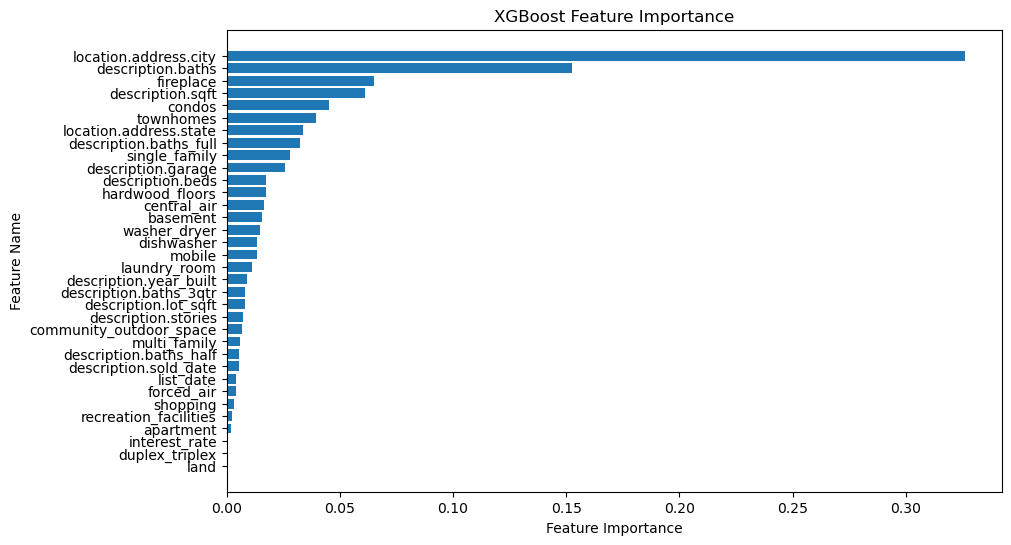

In [8]:
import matplotlib.pyplot as plt

# Get XG feature importance
importances = xg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [9]:
# Filter features above threshold
threshold = 0.02  # Adjustable

selected_features = importances_df[importances_df['Importance'] > threshold]['Feature']
selected_features = selected_features.reset_index(drop=True)

print(f"Selected Features: \n{selected_features}")

Selected Features: 
0     location.address.city
1         description.baths
2                 fireplace
3          description.sqft
4                    condos
5                 townhomes
6    location.address.state
7    description.baths_full
8             single_family
9        description.garage
Name: Feature, dtype: object


In [15]:
type(selected_features)

pandas.core.series.Series

In [10]:
# Reduce dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Send datasets to CSV
X_train_selected.to_csv('../data/processed/X_train_selected.csv')
X_test_selected.to_csv('../data/processed/X_test_selected.csv')
selected_features.to_csv('../data/preprocessed/selected_feature.csv')

In [11]:
#Fit model to selected 10 features
xg_selected = XGBRegressor()
xg_selected.fit(X_train_selected, y_train)

y_test_pred_selected = xg_selected.predict(X_test_selected)
y_train_pred_selected = xg_selected.predict(X_train_selected)

from sklearn.metrics import mean_squared_error, r2_score
print("R² Score:", round(r2_score(y_test, y_test_pred_selected),4))
print("MSE:", mean_squared_error(y_test, y_test_pred_selected))

get_error_scores (y_train, y_train_pred_selected, y_test, y_test_pred_selected)

R² Score: 0.9859
MSE: 493207040.0
R SQUARED
	Train R²:	0.9932
	Test R²:	0.9859
MEAN AVERAGE ERROR
	Train MAE:	10267.44
	Test MAE:	14464.9
ROOT MEAN SQUARED ERROR
	Train RMSE:	15204.88
	Test RMSE:	22208.27

10 Randomly selected results.
Index: 1202 	- 	Prediction: $396,516 	Actual: $385,000 	Difference: 11,516, -2.9%
Index: 430 	- 	Prediction: $373,298 	Actual: $389,500 	Difference: -16,202, 4.34%
Index: 1336 	- 	Prediction: $754,669 	Actual: $750,000 	Difference: 4,669, -0.62%
Index: 581 	- 	Prediction: $677,872 	Actual: $689,000 	Difference: -11,128, 1.64%
Index: 244 	- 	Prediction: $432,688 	Actual: $435,000 	Difference: -2,312, 0.53%
Index: 1226 	- 	Prediction: $207,230 	Actual: $245,000 	Difference: -37,770, 18.23%
Index: 340 	- 	Prediction: $136,074 	Actual: $145,000 	Difference: -8,926, 6.56%
Index: 1144 	- 	Prediction: $200,561 	Actual: $207,000 	Difference: -6,439, 3.21%
Index: 575 	- 	Prediction: $354,728 	Actual: $359,900 	Difference: -5,172, 1.46%
Index: 1098 	- 	Prediction:

In [12]:
#save model
xg_selected.save_model("../models/xgboost_model.json")